In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime 
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("tataSteel.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2468 non-null   object 
 1   Price     2468 non-null   float64
 2   Open      2468 non-null   float64
 3   High      2468 non-null   float64
 4   Low       2468 non-null   float64
 5   Vol.      2468 non-null   object 
 6   Change %  2468 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.set_index('Date')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2024-03-22 to 2014-04-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2468 non-null   float64
 1   Open      2468 non-null   float64
 2   High      2468 non-null   float64
 3   Low       2468 non-null   float64
 4   Vol.      2468 non-null   object 
 5   Change %  2468 non-null   object 
dtypes: float64(4), object(2)
memory usage: 135.0+ KB


In [8]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [9]:
df.index

DatetimeIndex(['2024-03-22', '2024-03-21', '2024-03-20', '2024-03-19',
               '2024-03-18', '2024-03-15', '2024-03-14', '2024-03-13',
               '2024-03-12', '2024-03-11',
               ...
               '2014-04-16', '2014-04-15', '2014-04-11', '2014-04-10',
               '2014-04-09', '2014-04-07', '2014-04-04', '2014-04-03',
               '2014-04-02', '2014-04-01'],
              dtype='datetime64[ns]', name='Date', length=2468, freq=None)

In [10]:
steel_prices = df.loc[:,'Price']
steel_prices.head()

Date
2024-03-22    151.50
2024-03-21    150.15
2024-03-20    145.70
2024-03-19    148.65
2024-03-18    149.60
Name: Price, dtype: float64

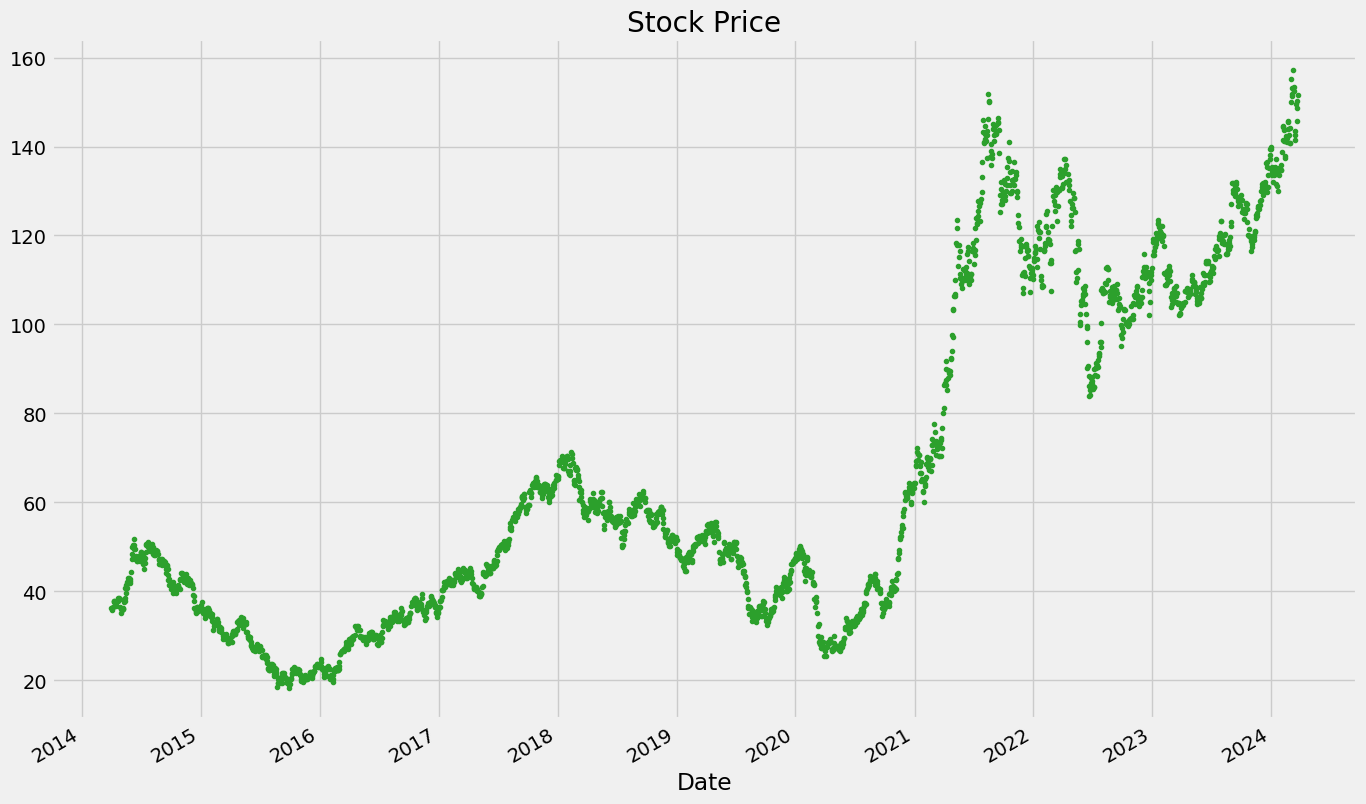

In [11]:
steel_prices.plot(
    style='.',
    figsize=(15,10),
    color= col_pal[2],
    title='Stock Price'
)
plt.show()

In [12]:
allTimeHigh = pd.Series(steel_prices)
maxPrice = allTimeHigh.max()

dateOfallTimeHigh = allTimeHigh.loc[allTimeHigh == maxPrice]
dateOfallTimeHigh

Date
2024-03-07    157.15
Name: Price, dtype: float64

In [13]:
allTimeLow = pd.Series(steel_prices)
minPrice = allTimeLow.min()

dateOfallTimeLow = allTimeLow.loc[allTimeLow == minPrice]
dateOfallTimeLow


Date
2015-09-29    18.12
Name: Price, dtype: float64

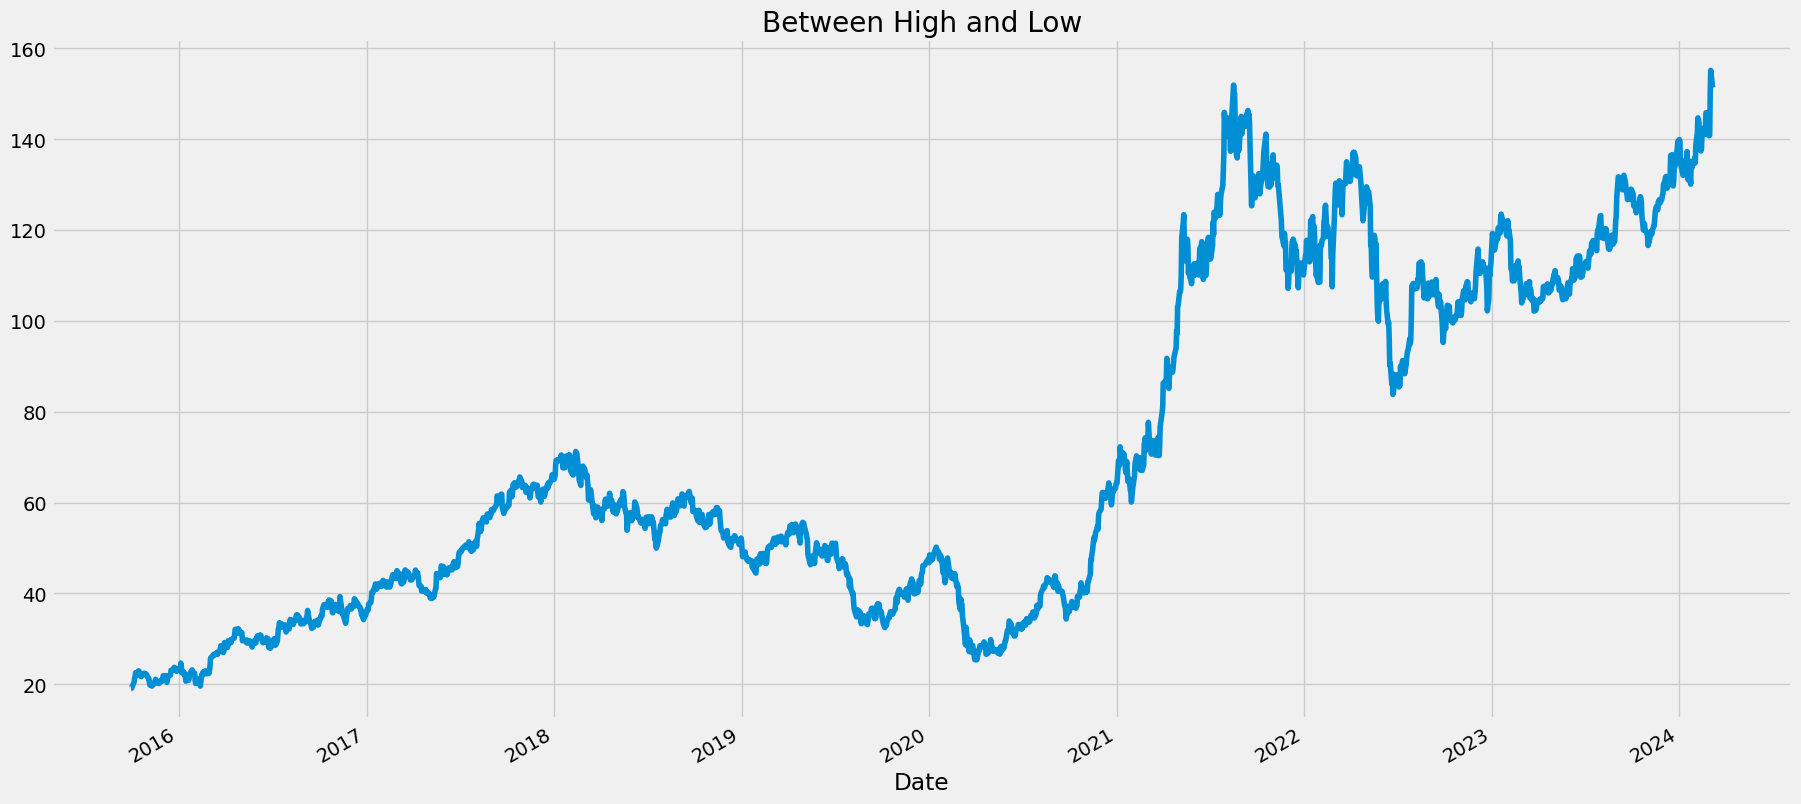

In [14]:
start_date = pd.to_datetime('2015-09-29')
end_date = pd.to_datetime('2024-03-07')

steel_prices.loc[(steel_prices.index > start_date) & (steel_prices.index < end_date)].plot(figsize=(20,10), title='Between High and Low')
plt.show()

In [15]:
stll = steel_prices.reset_index()

In [16]:
stll.head()

,Date,Price
0,2024-03-22,151.50
1,2024-03-21,150.15
2,2024-03-20,145.70
3,2024-03-19,148.65
4,2024-03-18,149.60


<Axes: ylabel='Frequency'>

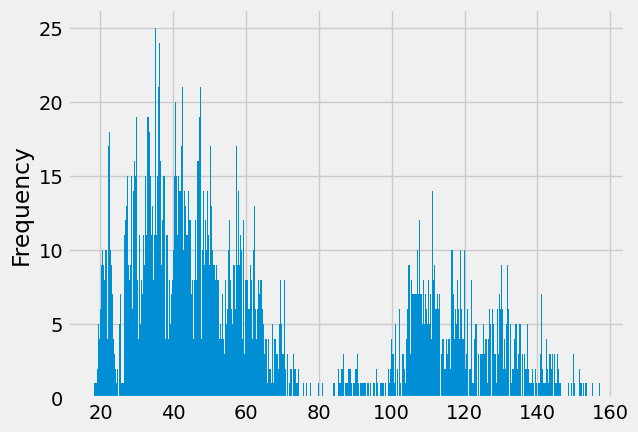

In [17]:
stll['Price'].plot(kind='hist',bins=500)

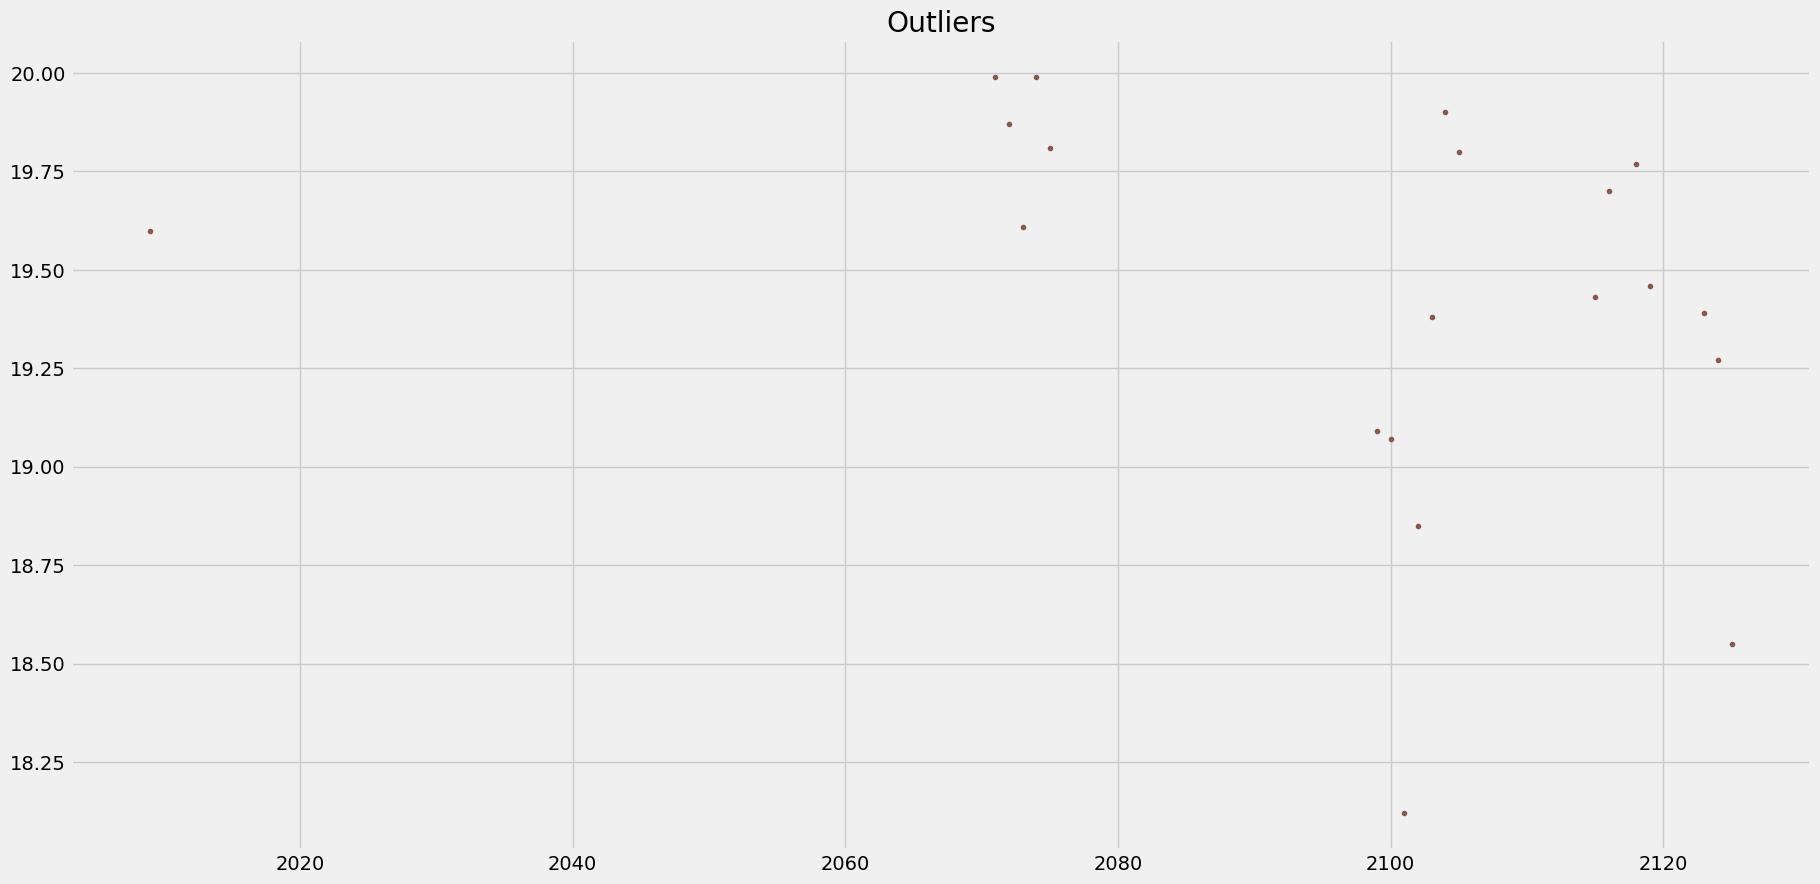

In [18]:
stll.query('Price < 20')['Price'].plot(style ='.',figsize=(20,10),color= col_pal[5],title='Outliers')
plt.show()

In [19]:
lessthan20 = stll.loc[:,'Price'] < 20
lessthan20.value_counts()

Price
False    2448
True       20
Name: count, dtype: int64

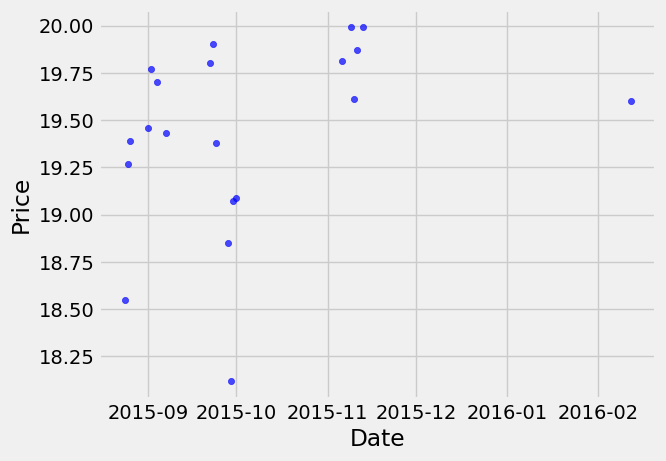

In [20]:
lessthanTwenty = stll.loc[stll['Price']< 20]
lessthanTwenty.plot.scatter(x='Date',y='Price', c='blue', alpha=0.7)
plt.grid(True)
plt.show()

In [21]:
def feature_create(df):
    df = df.copy()
    df['Month'] = df['Date'].dt.month
    df['DayofWeek'] = df['Date'].dt.dayofweek
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Year'] = df['Date'].dt.year
    df['Quarter'] = df['Date'].dt.quarter
    return df

stll_df = feature_create(stll)
stll_df.head()

,Date,Price,Month,DayofWeek,Week,Year,Quarter
0,2024-03-22,151.50,3,4,12,2024,1
1,2024-03-21,150.15,3,3,12,2024,1
2,2024-03-20,145.70,3,2,12,2024,1
3,2024-03-19,148.65,3,1,12,2024,1
4,2024-03-18,149.60,3,0,12,2024,1


In [22]:
spec_cols = ['Month','DayofWeek','Week','Year','Quarter']
correlations = {}
for col in spec_cols:
    correl = stll_df['Price'].corr(stll_df[col])
    # print(f'The correlation between Price and {col} is {correl}')
    correlations[col] = correl

print("Correlations between Price and other columns:")
for col, correlation in correlations.items():
    print(f"\t- {col}: {correlation:.2f}")  

Correlations between Price and other columns:
	- Month: -0.01
	- DayofWeek: 0.00
	- Week: -0.02
	- Year: 0.81
	- Quarter: -0.02


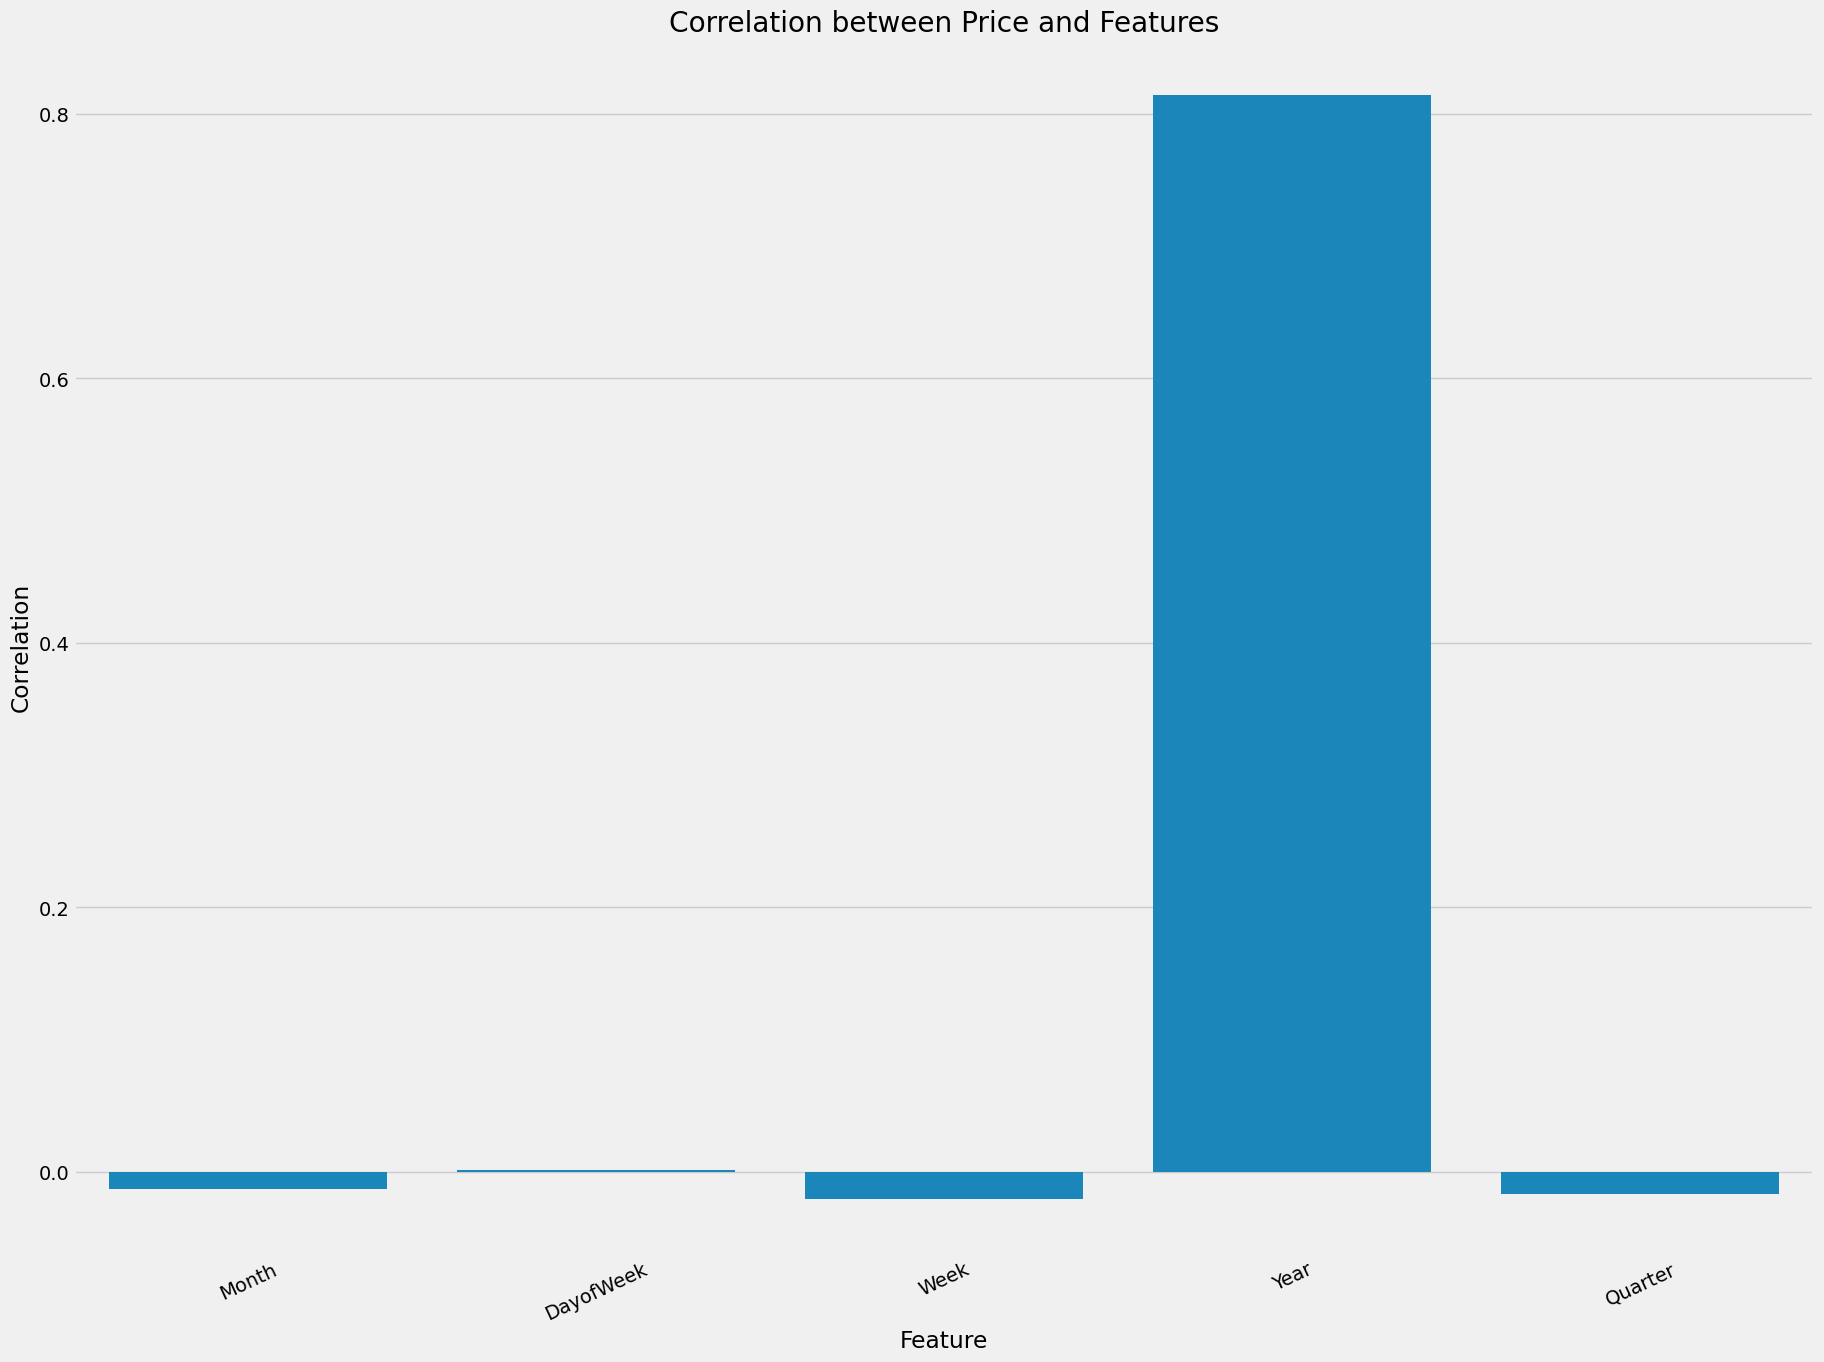

In [23]:
df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
plt.subplots(figsize=(20,15))
sns.barplot(x=df.index, y='correlation', data=df)


plt.xticks(rotation=25)  

plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation between Price and Features')

plt.show()

In [24]:
spec_cols = ['Month','DayofWeek','Week','Year','Quarter']
correlations = {}
for col in spec_cols:
    sp_correl,p_val = st.spearmanr(stll_df['Price'],stll_df[col])
    # print(f'The correlation between Price and {col} is {correl}')
    correlations[('Price',col)] = sp_correl

print("Correlations between Price and other columns:")
for col, correlation in correlations.items():
    print(f"\t- {col}: {correlation:.2f}")  
print(f"The p-value : {p_val}")

Correlations between Price and other columns:
	- ('Price', 'Month'): -0.01
	- ('Price', 'DayofWeek'): 0.00
	- ('Price', 'Week'): -0.02
	- ('Price', 'Year'): 0.77
	- ('Price', 'Quarter'): -0.01
The p-value : 0.5960390514937243


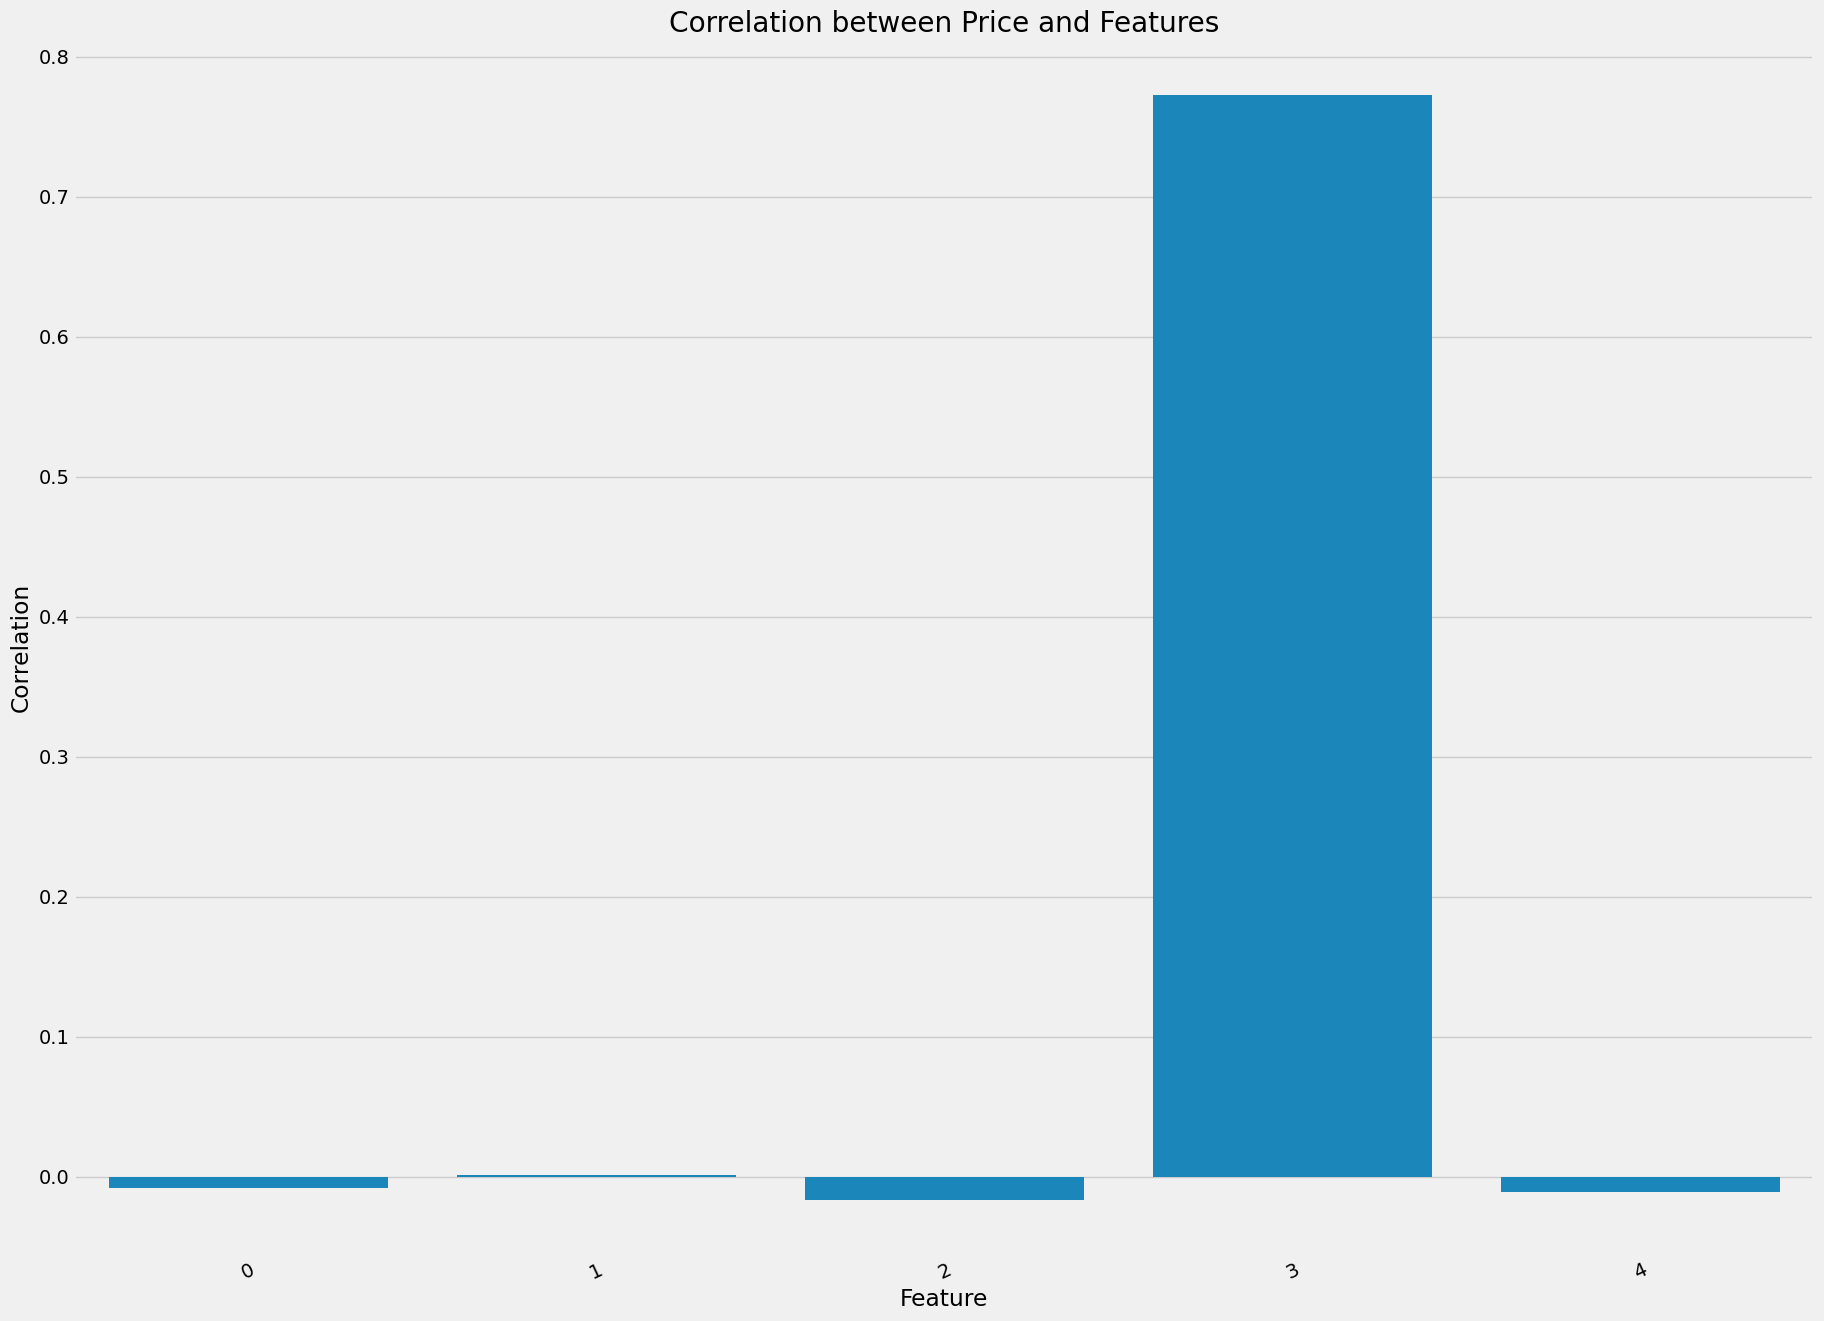

In [25]:
correlations_list = [val for val in correlations.values()]
correlations_df = pd.DataFrame({'correlation': correlations_list})

plt.subplots(figsize=(20,15))
sns.barplot(x=correlations_df.index, y='correlation', data=correlations_df)

plt.xticks(rotation=25)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation between Price and Features')

plt.show()

In [26]:
spec_cols = ['Month','DayofWeek','Week','Year','Quarter']
correlations = {}
for col in spec_cols:
    kt_correl,p_val = st.kendalltau(stll_df['Price'],stll_df[col])
    # print(f'The correlation between Price and {col} is {correl}')
    correlations[('Price',col)] = kt_correl

print("Correlations between Price and other columns:")
for col, correlation in correlations.items():
    print(f"\t- {col}: {correlation:.2f}") 
print(f"The p-value : {p_val}")

Correlations between Price and other columns:
	- ('Price', 'Month'): 0.00
	- ('Price', 'DayofWeek'): 0.00
	- ('Price', 'Week'): -0.00
	- ('Price', 'Year'): 0.58
	- ('Price', 'Quarter'): -0.00
The p-value : 0.8239965063226408


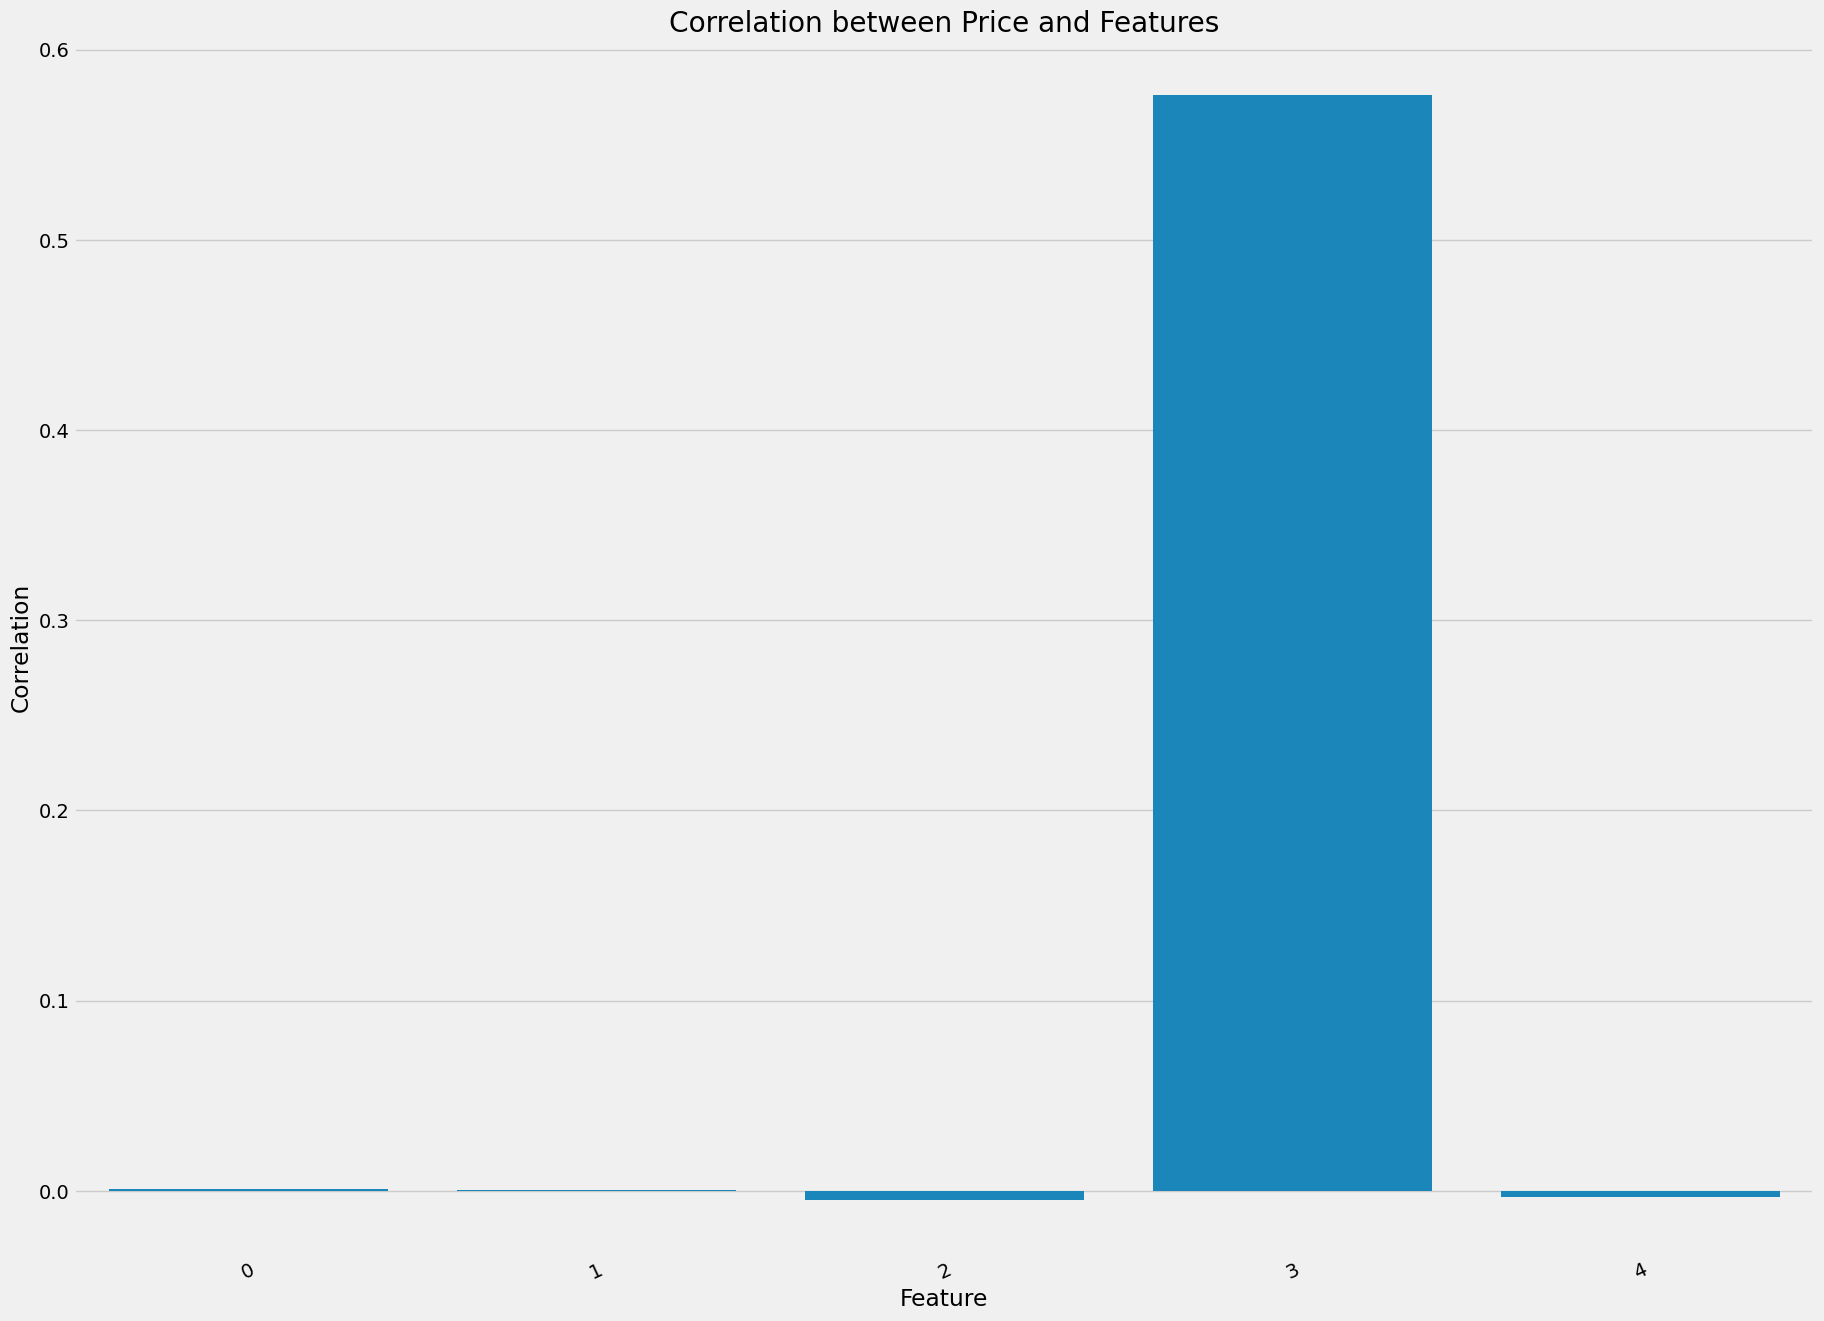

In [27]:
correlations_list = [val for val in correlations.values()]
correlations_df = pd.DataFrame({'correlation': correlations_list})

plt.subplots(figsize=(20,15))
sns.barplot(x=correlations_df.index, y='correlation', data=correlations_df)

plt.xticks(rotation=25)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation between Price and Features')

plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [30]:
correlations_list = [val for val in correlations.values()]
correlations_df = pd.DataFrame({'correlation': correlations_list})

In [36]:
correlations_df.columns

Index(['correlation'], dtype='object')

In [37]:
X = correlations_df[['correlation']]  
y = correlations_df['correlation']

In [38]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()